EDA focuses on data enginering role

In [1]:
# 1. Import libraries
import ast 
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt
import seaborn as sns 

# 2. Load a dataset
ds = load_dataset("lukebarousse/data_jobs")  

df_copy = ds['train'].to_pandas()  

df = df_copy.copy()  


# 3. Data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)  

df['job_skills'] = df['job_skills'].apply(
    lambda skills: ast.literal_eval(skills) if pd.notna(skills) else []
)

c:\Users\User\anaconda3\envs\analysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 1. Filter dataset for a specific country and job title
df_uk = df[(df['job_country'] == df['job_country'].value_counts().index[2]) & (df['job_title_short'] == df['job_title_short'].value_counts().index[1])].copy()
# Select the third most common country and the second most common job title

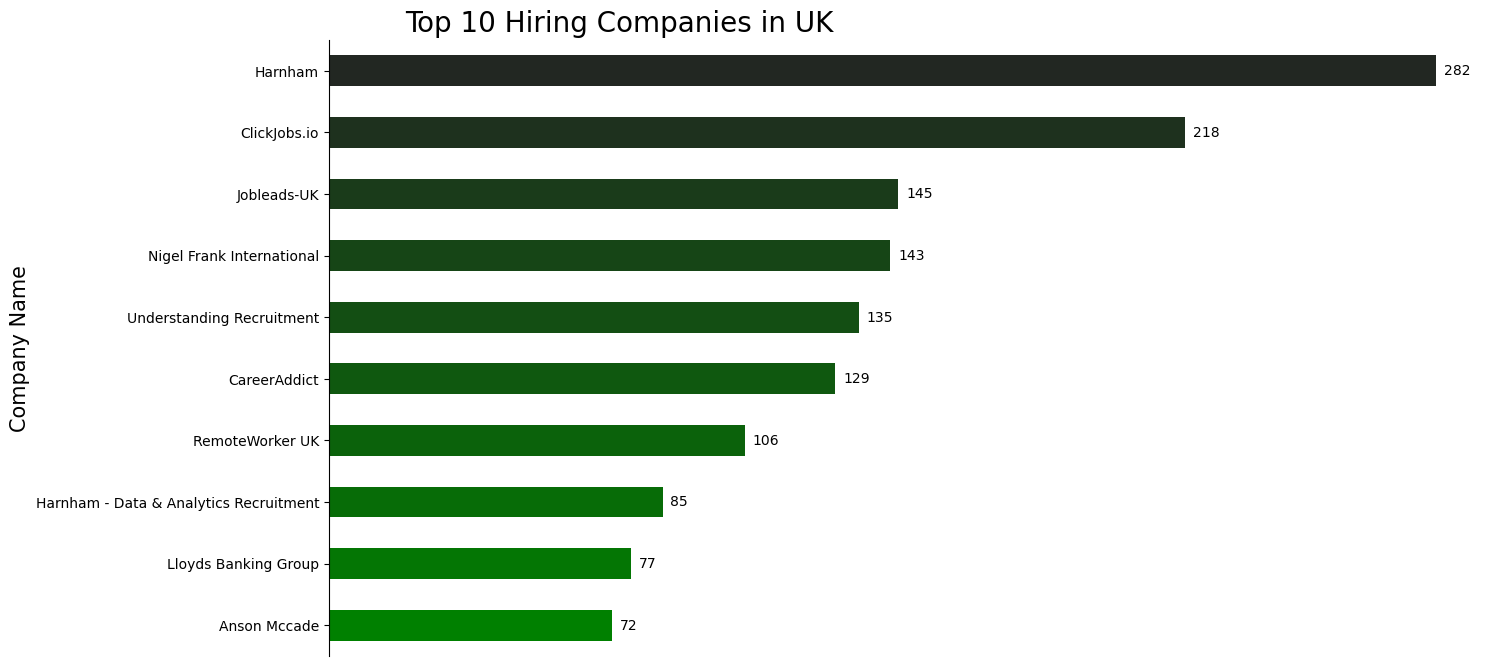

In [ ]:
# 1. Identify top 10 hiring companies
top_10_comp = df_uk['company_name'].value_counts().head(10).sort_values(ascending=True)
# Count job postings per company
# Select top 10 companies
# Sort ascending for better horizontal bar visualization


# 2. Create color palette
colors = sns.color_palette("dark:g_r", n_colors=len(top_10_comp))


# 3. Plot horizontal bar chart
ax = top_10_comp.plot(
    kind='barh', 
    color=colors, 
    figsize=(15, 8)
)


# 4. Add value labels next to bars
for i, value in enumerate(top_10_comp):
    ax.text(
        x=value + 2, 
        y=i, 
        s=str(value), 
        va='center'
    )


# 5. Clean up plot appearance
ax.xaxis.set_visible(False)  # Hide x-axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# 6. Add title and labels
ax.set_title(
    'Top 10 Hiring Companies in UK', 
    fontsize=20, 
    loc='center', 
    x=0.25
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Company Name', fontsize=15)

plt.show()

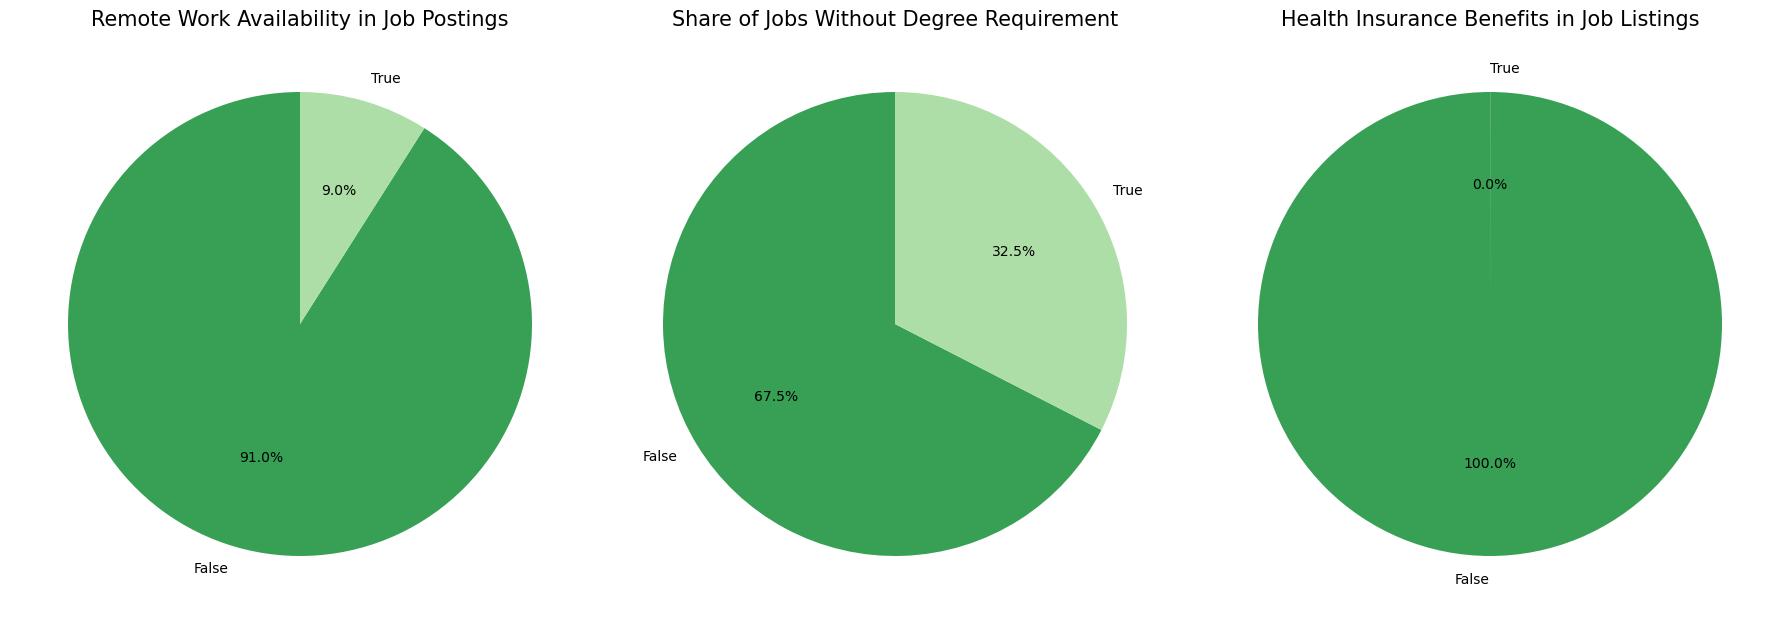

In [4]:
# 1. Get unique boolean categories (True / False)
t_f = df_uk['job_health_insurance'].value_counts().index
# Extract labels (e.g., True / False) for pie charts


# 2. Define columns to visualize with corresponding titles
columns = {
    'job_work_from_home': 'Remote Work Availability in Job Postings',
    'job_no_degree_mention': 'Share of Jobs Without Degree Requirement',
    'job_health_insurance': 'Health Insurance Benefits in Job Listings'
}
# Dictionary maps column names to chart titles


# 3. Create color palette
colors = sns.color_palette("Greens", n_colors=len(t_f))
colors = colors[::-1]  # Reverse for better visual contrast


# 4. Create figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 10))


# 5. Loop through each column and create pie chart
for i, (column, name) in enumerate(columns.items()):
    
    ax[i].pie(
        df_uk[column].value_counts(),  # Count True/False values
        labels=t_f,                    # Use consistent labels
        autopct='%1.1f%%',              # Show percentages
        startangle=90,                  # Rotate for better alignment
        radius=1,
        colors=colors
    )
    
    ax[i].set_title(name, fontsize=15)


plt.tight_layout()
plt.show()



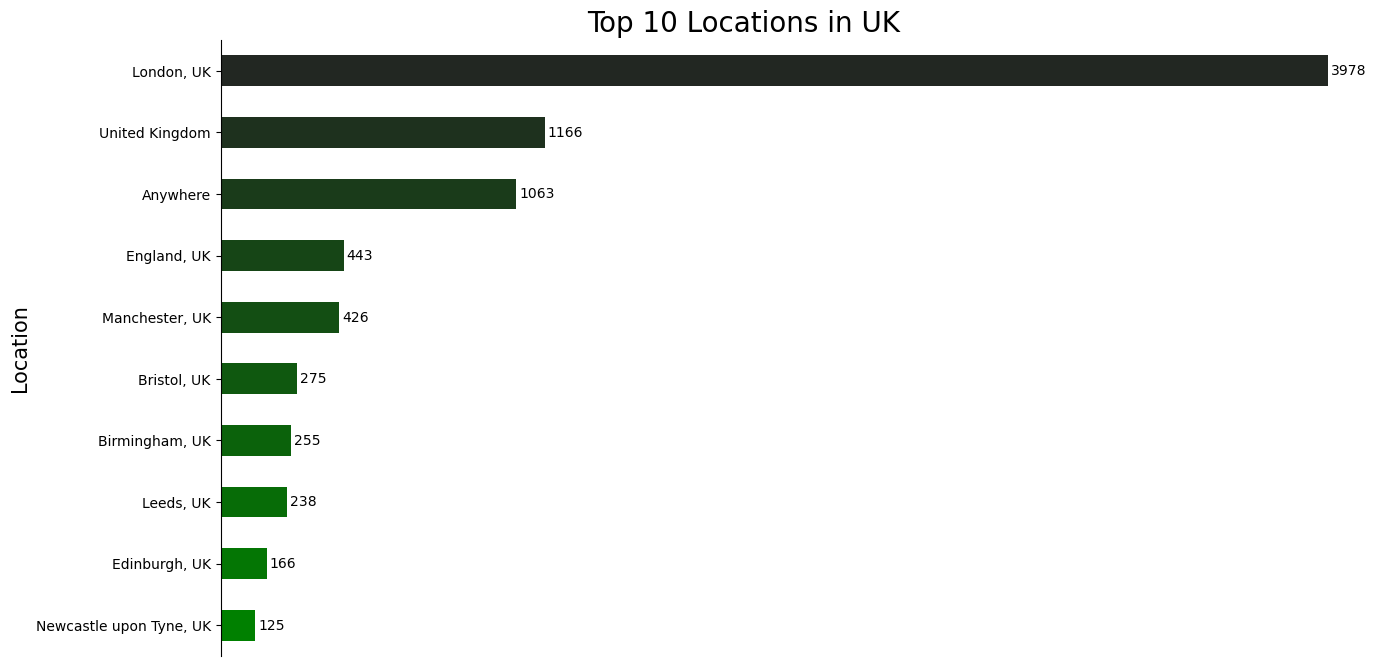

In [ ]:
# 1. Identify top 10 job locations
top_10_loc = df_uk['job_location'].value_counts().head(10).sort_values(ascending=True)
# Count job postings per location
# Select top 10 locations
# Sort ascending for better horizontal bar visualization


# 2. Create color palette
colors = sns.color_palette("dark:g_r", n_colors=len(top_10_loc))


# 3. Plot horizontal bar chart
ax = top_10_loc.plot(
    kind='barh',
    color=colors,
    figsize=(15, 8)
)


# 4. Add value labels next to bars
for i, value in enumerate(top_10_loc):
    ax.text(
        x=value + 10,
        y=i,
        s=str(value),
        va='center'
    )


# 5. Clean up plot appearance
ax.xaxis.set_visible(False)  # Hide x-axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# 6. Add title and labels
ax.set_title(
    'Top 10 Locations in UK',
    fontsize=20,
    loc='center',
    x=0.45
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Location', fontsize=15)

plt.show()

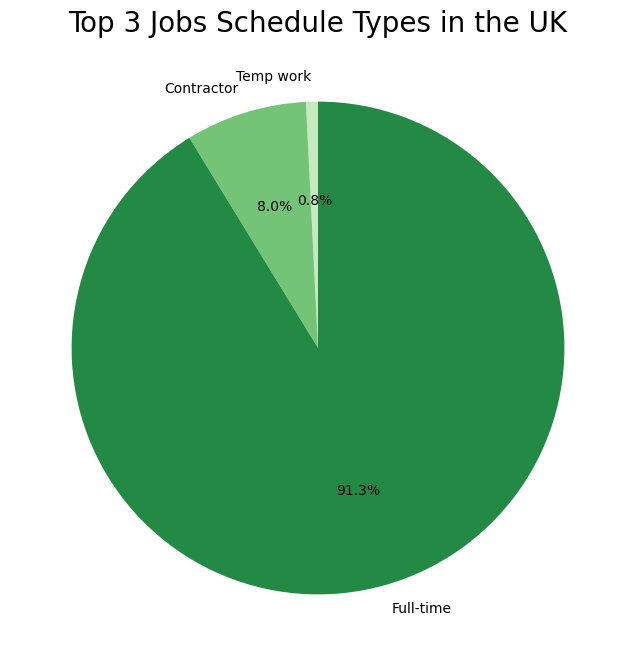

In [ ]:
# 1. Identify top 3 job schedule types
top_3 = df_uk['job_schedule_type'].value_counts().head(3).sort_values(ascending=True)
# Count job postings per schedule type
# Select top 3 most common types
# Sort ascending for better pie chart ordering


# 2. Create color palette
colors = sns.color_palette("Greens", n_colors=len(top_3))


# 3. Plot pie chart
top_3.plot(
    kind='pie',
    autopct='%1.1f%%',   # Show percentages
    startangle=90,      # Rotate for better alignment
    figsize=(10, 8),
    colors=colors
)


# 4. Final styling
plt.ylabel('')  # Remove default y-label
plt.title('Top 3 Jobs Schedule Types in the UK', fontsize=20)

plt.show()

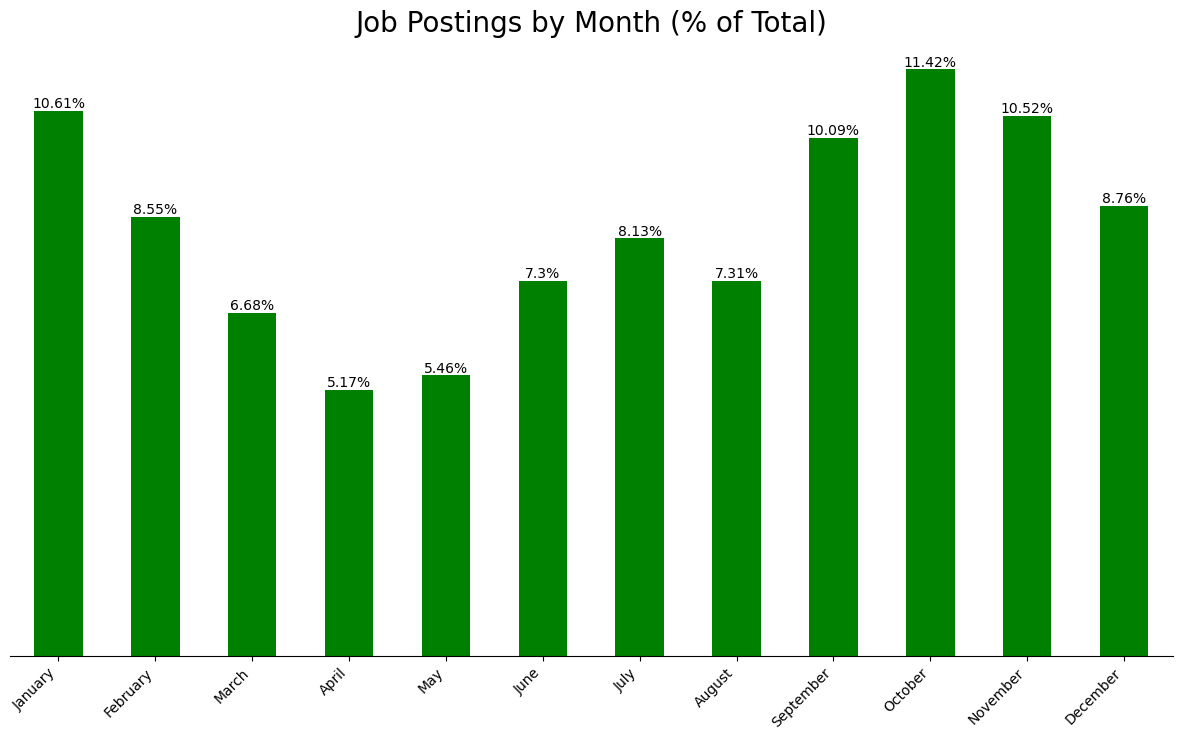

In [ ]:
# 1. Extract month from posting date
df_uk['job_posted_month'] = df_uk['job_posted_date'].dt.month
# Create a column containing the month number


# 2. Count job postings per month
job_postings = df_uk.groupby('job_posted_month').size().reset_index(name='num_postings')
# Count total job postings for each month


# 3. Convert month number to month name
job_postings['job_month'] = pd.to_datetime(
    job_postings['job_posted_month'], 
    format='%m'
).dt.month_name()

job_postings.drop(columns='job_posted_month', inplace=True)
# Keep only readable month names


# 4. Calculate percentage of total job postings
total_jobs = job_postings['num_postings'].sum()

job_postings['pct_gt'] = (
    job_postings['num_postings'] / total_jobs * 100
).round(2)
# Compute each month's share of total postings


# 5. Plot bar chart
ax = job_postings.plot(
    kind='bar',
    x='job_month',
    y='num_postings',
    figsize=(15, 8),
    legend=False,
    color='green'
)


# 6. Add percentage labels above bars
for i, numb in enumerate(job_postings['num_postings']):
    pct = job_postings['pct_gt'].iloc[i]
    ax.text(
        x=i,
        y=numb,
        s=f'{pct}%',
        ha='center',
        va='bottom',
        fontsize=10
    )


# 7. Clean up plot appearance
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


# 8. Add title and formatting
ax.set_title('Job Postings by Month (% of Total)', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')

plt.show()